## Exercise 6.9 - Windy Gridworld with King’s Moves

Re-solve the windy gridworld assuming eight possible actions, including the diagonal moves,
rather than the usual four. How much better can you do with the extra actions? Can you do
even better by including a ninth action that causes no movement at all other than that caused
by the wind?

In [1]:
! pip3 -q install numpy matplotlib gym

In [2]:
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import windy
from sarsa import sarsa, run_episode

### Reproduction of Example 6.5

To get the optimal policy that solves the gridworld in 15 steps, the Sarsa algorithm uses a
learning rate decay inversely proportional to episode number $\epsilon = 1/e$. Using a fixed
exploration rate equal to $0.10$, as is done in the book, reliably achieved only 16-17 steps.

Also, the policies sometimes happen to contain loops. Agent then runs in an meaningless infinite
cycle that prevents the episode from terminating. There's a 5000 time-step limit for every episode
to prevent this. I'm fairly certain that it has no effect on the optimal policy because the first
exploratory episode usually takes around 1500 steps. The following episodes are much shorter and
the termination limit is well above the length of the first one.

In [3]:
env = gym.make('WindyGridworld-v0')
q, policy, history = sarsa(env, 500, eps0=0.5, alpha=0.5)

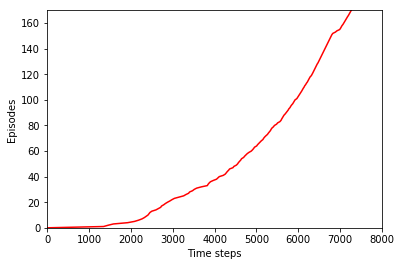

In [4]:
plt.figure()
plt.xlabel("Time steps"); plt.xlim(0, 8_000)
plt.ylabel("Episodes"); plt.ylim(0, 170)
timesteps = np.cumsum([0] + history)
plt.plot(timesteps, np.arange(len(timesteps)), color='red')
plt.show()

In [5]:
matplotlib.rcParams['figure.figsize'] = [10, 10]


def plot_results(env, q, policy):
    fig = plt.figure()
    ax = fig.gca()
    ax.set_title("Optimal Value Function and Policy")
    
    q = np.copy(q)
    unvisited = np.where(q == 0)
    q[unvisited] = -np.inf
    v = np.max(q, axis=1).reshape(env.observation_space.nvec)
    ax.imshow(v.T, origin='lower')

    a_stars = np.argmax(policy, axis=1)
    arrows = np.array([env.actions[a] for a in a_stars])
    arrows[unvisited[0], :] = 0
    arrows = arrows.reshape([*env.observation_space.nvec, 2])
    xr = np.arange(env.observation_space.nvec[0])
    yr = np.arange(env.observation_space.nvec[1])
    ax.quiver(xr, yr, arrows[:, :, 0].T, arrows[:, :, 1].T, pivot='mid')

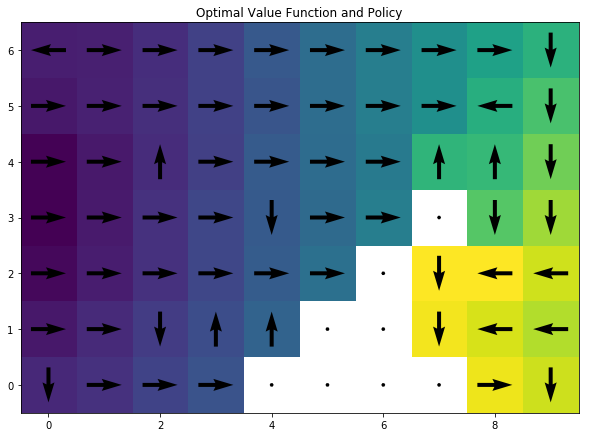

In [6]:
plot_results(env, q, policy)

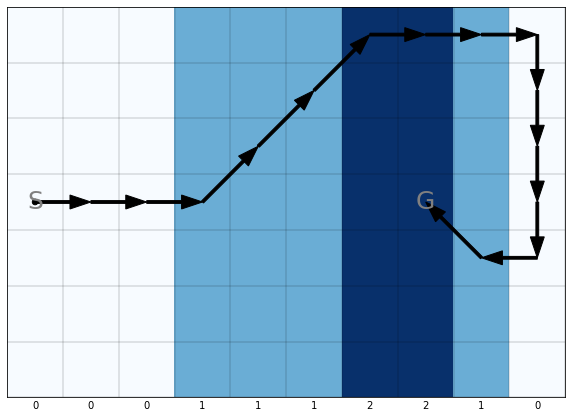

Episode length = 15


In [7]:
rewards = run_episode(env, policy, render=True)
print(f"Episode length = {len(rewards)}")

### Windy Gridworld with King's Moves

Adding king's moves to the problem allows the agent to reach the goal in 7 steps. Thanks to the
diagonal moves it's now possible to "fight" the wind and progress toward the goal at the same
time. In the region with the wind strength of 1 it's possible to move horizontally thanks to the
south-east action that counter-acts the wind effect.

In [8]:
env = gym.make('WindyGridworld-v0', king=True)
q, policy, _ = sarsa(env, 500, eps0=0.5, alpha=0.5)

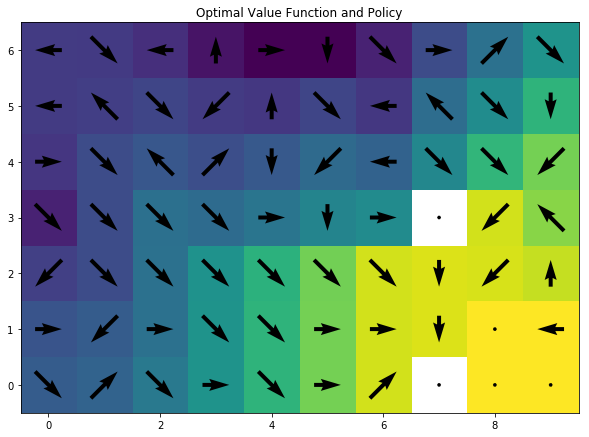

In [9]:
plot_results(env, q, policy)

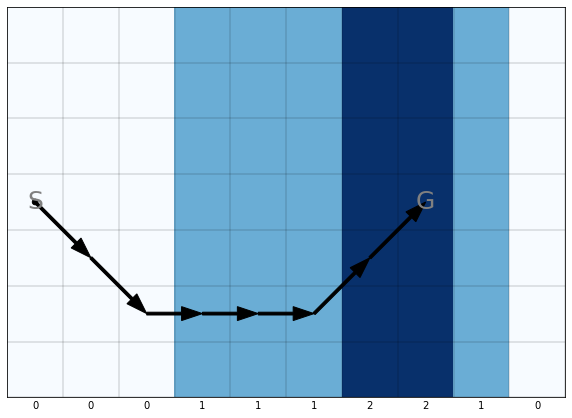

Episode length = 7


In [10]:
rewards = run_episode(env, policy, render=True)
print(f"Episode length = {len(rewards)}")

### Windy Gridworld with King's Moves and Stop

Adding a stop action doesn't allow the algorithm to findd a better policy than with king's
moves alone. The reason is that king's moves already make it possible to get the best possible
solution within the limitation of moving one gridworld tile at a time.

Even in a situation without any wind, it's not possible to reach the goal in less than
7 steps. The optimal policy in this particular case is to follow a straight line from
start to the goal - a 7 steps long path. The optimal path length in the wind-less case
is "broadway distance" (i.e. manhattan distance with diagonal moves) from start to goal.

In [11]:
env = gym.make('WindyGridworld-v0', king=True, stop=True)
q, policy, _ = sarsa(env, 500, eps0=0.5, alpha=0.5)

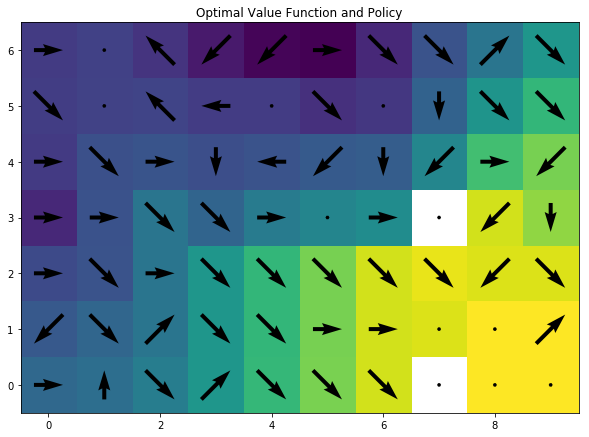

In [12]:
plot_results(env, q, policy)

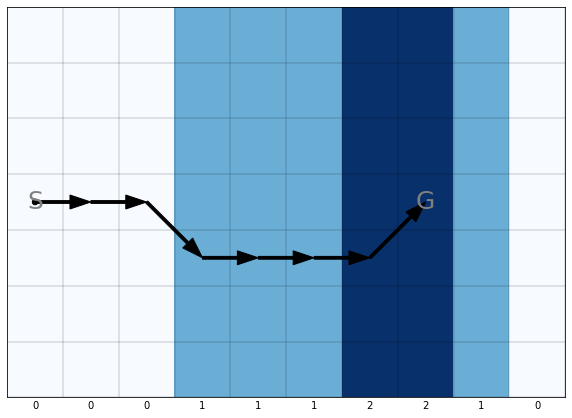

Episode length = 7


In [13]:
rewards = run_episode(env, policy, render=True)
print(f"Episode length = {len(rewards)}")